Импорь библиотек для EDA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew, norm
import scipy.stats as stats
from scipy.stats import norm

import warnings

warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('data_3.csv')
data_w = data.copy()
data_w.columns = data_w.columns.str.replace(' ', '')
data_w.info()
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed:0.1                        120 non-null    int64  
 1   Unnamed:0                          120 non-null    int64  
 2   price                              120 non-null    int64  
 3   rooms                              101 non-null    float64
 4   area                               107 non-null    float64
 5   kitchen_area                       89 non-null     float64
 6   floor                              107 non-null    float64
 7   renovation                         120 non-null    int64  
 8   deal_type                          120 non-null    int64  
 9   balcony                            120 non-null    int64  
 10  trash_chute                        83 non-null     float64
 11  Годпостройки                       107 non-null    float64

In [3]:
data_w.head()

,Unnamed:0.1,Unnamed:0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,latitude,longitude,wall_material_Блочный,wall_material_Железобетон,wall_material_Кирпично-монолитный,wall_material_Кирпичный,wall_material_Монолитно-кирпичный,wall_material_Монолитный,wall_material_Панельный,wall_material_Смешанные
0,0,0,4500000,1.0,22.6,3.0,3.0,1,1,0,...,43.122565,131.907848,False,False,False,False,False,False,True,False
1,1,1,10000000,3.0,75.4,5.0,6.0,1,1,0,...,43.118957,131.968481,False,False,False,False,False,True,False,False
2,2,2,6650000,1.0,31.6,5.0,2.0,0,0,0,...,43.183735,131.925201,False,False,False,True,False,False,False,False
3,3,3,11000000,2.0,47.0,3.1,6.0,0,0,1,...,43.086209,131.854930,False,False,False,False,False,True,False,False
4,4,4,4900000,1.0,24.1,3.0,16.0,0,0,0,...,43.118827,131.970732,False,False,False,False,False,True,False,False


Проведенный анализ распределения целевой переменной 'price' показывает, что данные распределены не нормально с сильным смещением

<Axes: xlabel='price', ylabel='Density'>

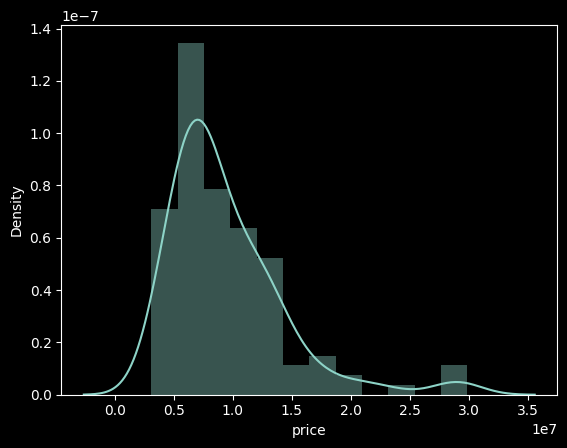

In [4]:

sns.distplot(data_w['price'])


Проведенный тест Шапиро-Уилка подтверждает гипотезу не гауссовского распределения, следовательно необходимо использовать средства нормализации. В данном примере будет использоваться логарифмизация

In [5]:
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['price'])

print("Skewness: %f" % abs(data_w['price']).skew())
print("Kurtosis: %f" % abs(data_w['price']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.919558
Kurtosis: 4.771441
Shapiro_Test: 0.829326
Shapiro_Test: 0.000000


In [6]:
data_w['price'].describe()

count    1.200000e+02
mean     9.454758e+06
std      4.963650e+06
min      3.100000e+06
25%      6.175000e+06
50%      7.900000e+06
75%      1.168750e+07
max      2.985000e+07
Name: price, dtype: float64

In [7]:
data_w['Жилая'] = data_w['Жилая'].str.replace('м2', '').str.replace(',', '.').astype(float)


Построение корреляционной матрицы

In [8]:
correlation_matrix = data_w.corr(numeric_only=True)
correlation_matrix

,Unnamed:0.1,Unnamed:0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,latitude,longitude,wall_material_Блочный,wall_material_Железобетон,wall_material_Кирпично-монолитный,wall_material_Кирпичный,wall_material_Монолитно-кирпичный,wall_material_Монолитный,wall_material_Панельный,wall_material_Смешанные
Unnamed:0.1,1.000000,1.000000,-0.005592,-0.039623,0.076052,0.223160,-0.061105,-0.040040,0.091916,-0.044327,...,0.077248,-0.079997,0.078926,-0.103355,0.103355,-0.025569,0.022343,0.091683,-0.123368,-0.033080
Unnamed:0,1.000000,1.000000,-0.005592,-0.039623,0.076052,0.223160,-0.061105,-0.040040,0.091916,-0.044327,...,0.077248,-0.079997,0.078926,-0.103355,0.103355,-0.025569,0.022343,0.091683,-0.123368,-0.033080
price,-0.005592,-0.005592,1.000000,0.542750,0.797276,0.557584,0.144042,0.130280,0.052891,0.013067,...,0.058286,-0.063173,-0.111405,-0.077165,-0.004735,0.271744,-0.063109,0.131649,-0.295830,0.139932
rooms,-0.039623,-0.039623,0.542750,1.000000,0.734159,0.300069,0.014339,0.217746,0.058159,-0.064478,...,-0.120428,0.118261,-0.010644,-0.164216,-0.087430,0.232259,-0.115536,-0.097785,-0.000234,-0.007488
area,0.076052,0.076052,0.797276,0.734159,1.000000,0.553952,-0.011374,0.207187,0.024331,-0.098120,...,-0.046764,0.046656,-0.036576,-0.103860,-0.034183,0.243455,-0.088627,0.011313,-0.154276,0.045755
kitchen_area,0.223160,0.223160,0.557584,0.300069,0.553952,1.000000,-0.037544,0.117352,-0.077499,-0.088119,...,-0.075843,0.079657,-0.039205,0.036079,-0.078483,-0.014904,-0.078193,0.209603,-0.111704,-0.032166
floor,-0.061105,-0.061105,0.144042,0.014339,-0.011374,-0.037544,1.000000,-0.183677,0.026267,0.080066,...,-0.035700,0.025328,-0.121162,0.034255,0.021303,-0.156618,-0.094384,0.351212,-0.173096,0.179057
renovation,-0.040040,-0.040040,0.130280,0.217746,0.207187,0.117352,-0.183677,1.000000,0.101662,-0.036620,...,0.056722,-0.062022,0.081859,0.081859,-0.062598,0.211884,-0.017768,-0.353379,0.169493,0.057639
deal_type,0.091916,0.091916,0.052891,0.058159,0.024331,-0.077499,0.026267,0.101662,1.000000,0.026071,...,0.081651,-0.079690,0.104463,0.104463,-0.028894,0.020590,0.019136,0.010024,-0.033529,-0.114245
balcony,-0.044327,-0.044327,0.013067,-0.064478,-0.098120,-0.088119,0.080066,-0.036620,0.026071,1.000000,...,0.109304,-0.111260,0.015293,0.015293,-0.115791,-0.080956,0.072553,-0.008061,0.076901,0.103069


Согласно корреляционному анализу можно сделать вывод о характеристиках, которые плохо коррелируют с прогнозируемой величиной. Также был выведен определенный набор признаков, у которых слишком большое количество пустых значений. Также несколько фичей логическим образом не влияют на цену недвижимости. Следовательно эти данные требуется удалить из выборки.

In [9]:
# cat_over_columns = ['Сериядома' , 'Типперекрытий' ,'Типфундамента', 'Горячееводоснабжение', 'Холодноеводоснабжение', 'Теплоснабжение', 'Водоотведение', 'years_in_ownership', 'energy_efficiency_class', 'power_supply' , 'ventilation', 'freight_elevator', 'gas_supply']
# data_w.drop(columns=cat_over_columns, inplace=True)

In [10]:
too_much_columns = ['Жилая', 'number_of_owners', 'Теплоснабжение','number_of_elevators', 'energy_efficiency_class','gas_supply', 'freight_elevator', 'ventilation', 'number_of_owners', 'power_supply', 'Количествоподъездов', 'years_in_ownership', 'Водоотведение', 'Водоотведение', 'gas_supply']
data_w.drop(columns=too_much_columns, inplace=True)

In [11]:
columns_to_remove = ['Unnamed:0', 'Unnamed:0.1', 'longitude', 'latitude', 'Сериядома']
data_w.drop(columns=[col for col in columns_to_remove if col in data_w.columns], inplace=True)

In [12]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              120 non-null    int64  
 1   rooms                              101 non-null    float64
 2   area                               107 non-null    float64
 3   kitchen_area                       89 non-null     float64
 4   floor                              107 non-null    float64
 5   renovation                         120 non-null    int64  
 6   deal_type                          120 non-null    int64  
 7   balcony                            120 non-null    int64  
 8   trash_chute                        83 non-null     float64
 9   Годпостройки                       107 non-null    float64
 10  Количествоэтажей                   116 non-null    float64
 11  Лифт                               48 non-null     float64

У оставшихся признаках требуется удалить пустые значения. Для числовых значений будет использоваться медианное по всему столбцу, а для категориальных соответственно модальное значение

In [13]:
medians = data_w.select_dtypes(include='number').median()
data_w.fillna(value=medians, inplace=True)

modes = data_w.select_dtypes(include='object').mode().iloc[0]
data_w.fillna(value=modes, inplace=True)

data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              120 non-null    int64  
 1   rooms                              120 non-null    float64
 2   area                               120 non-null    float64
 3   kitchen_area                       120 non-null    float64
 4   floor                              120 non-null    float64
 5   renovation                         120 non-null    int64  
 6   deal_type                          120 non-null    int64  
 7   balcony                            120 non-null    int64  
 8   trash_chute                        120 non-null    float64
 9   Годпостройки                       120 non-null    float64
 10  Количествоэтажей                   120 non-null    float64
 11  Лифт                               120 non-null    float64

In [14]:
columns_to_remove = ['Unnamed:0', 'Unnamed:0.1']
data_w.drop(columns=[col for col in columns_to_remove if col in data_w.columns], inplace=True)

Проверка всех столбцов на количество NaN значений

In [15]:
data_w.isnull().sum()

price                                0
rooms                                0
area                                 0
kitchen_area                         0
floor                                0
renovation                           0
deal_type                            0
balcony                              0
trash_chute                          0
Годпостройки                         0
Количествоэтажей                     0
Лифт                                 0
Типперекрытий                        0
Типфундамента                        0
Горячееводоснабжение                 0
Количествобалконов                   0
Количествоквартир                    0
Холодноеводоснабжение                0
wall_material_Блочный                0
wall_material_Железобетон            0
wall_material_Кирпично-монолитный    0
wall_material_Кирпичный              0
wall_material_Монолитно-кирпичный    0
wall_material_Монолитный             0
wall_material_Панельный              0
wall_material_Смешанные  

In [16]:
correlation_matrix = data_w.corr(numeric_only=True)
correlation_matrix

,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,trash_chute,Годпостройки,...,Количествобалконов,Количествоквартир,wall_material_Блочный,wall_material_Железобетон,wall_material_Кирпично-монолитный,wall_material_Кирпичный,wall_material_Монолитно-кирпичный,wall_material_Монолитный,wall_material_Панельный,wall_material_Смешанные
price,1.000000,0.481614,0.722532,0.451951,0.131638,0.130280,0.052891,0.013067,0.048070,0.215919,...,NaN,-0.033796,-0.111405,-0.077165,-0.004735,0.271744,-0.063109,0.131649,-0.295830,0.139932
rooms,0.481614,1.000000,0.713953,0.241589,0.014877,0.195570,0.055101,-0.061076,0.023936,-0.091112,...,NaN,0.000552,-0.008940,-0.162199,-0.085570,0.224796,-0.073831,-0.089539,-0.002141,-0.006295
area,0.722532,0.713953,1.000000,0.488314,-0.006381,0.199776,0.026225,-0.093333,0.109967,0.064275,...,NaN,-0.007239,-0.033366,-0.100425,-0.030980,0.245454,-0.071032,0.015523,-0.150824,0.047800
kitchen_area,0.451951,0.241589,0.488314,1.000000,-0.030105,0.101103,-0.068985,-0.073273,-0.038711,0.229236,...,NaN,-0.090746,-0.035701,0.039288,-0.074826,-0.015763,-0.051932,0.187120,-0.096639,-0.029730
floor,0.131638,0.014877,-0.006381,-0.030105,1.000000,-0.158736,0.028259,0.074350,-0.086902,0.372193,...,NaN,0.060090,-0.117426,0.037421,0.024517,-0.140459,-0.075654,0.338766,-0.168707,0.180812
renovation,0.130280,0.195570,0.199776,0.101103,-0.158736,1.000000,0.101662,-0.036620,-0.159663,-0.373984,...,NaN,-0.027243,0.081859,0.081859,-0.062598,0.211884,-0.017768,-0.353379,0.169493,0.057639
deal_type,0.052891,0.055101,0.026225,-0.068985,0.028259,0.101662,1.000000,0.026071,0.049894,-0.058223,...,NaN,-0.058036,0.104463,0.104463,-0.028894,0.020590,0.019136,0.010024,-0.033529,-0.114245
balcony,0.013067,-0.061076,-0.093333,-0.073273,0.074350,-0.036620,0.026071,1.000000,0.094039,0.063582,...,NaN,-0.061023,0.015293,0.015293,-0.115791,-0.080956,0.072553,-0.008061,0.076901,0.103069
trash_chute,0.048070,0.023936,0.109967,-0.038711,-0.086902,-0.159663,0.049894,0.094039,1.000000,0.174970,...,NaN,-0.048145,0.045379,0.045379,0.045379,-0.092969,0.055815,-0.044365,0.052659,0.031953
Годпостройки,0.215919,-0.091112,0.064275,0.229236,0.372193,-0.373984,-0.058223,0.063582,0.174970,1.000000,...,NaN,0.088361,-0.234952,0.094407,0.026358,-0.327859,0.170801,0.618867,-0.361728,0.041559


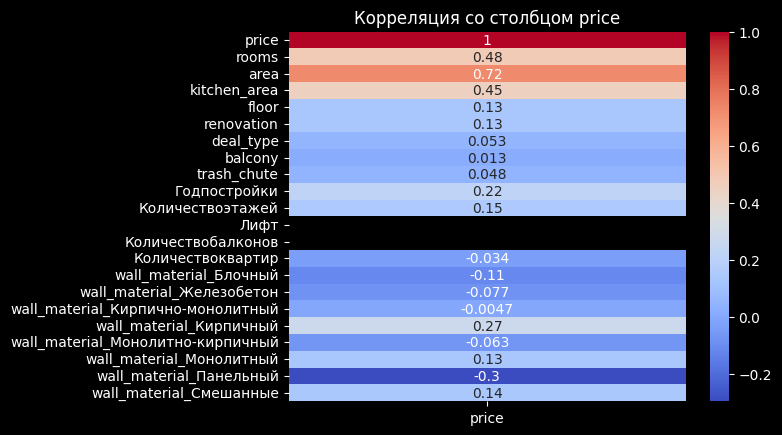

In [17]:
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm')
plt.title('Корреляция со столбцом price')
plt.show()

Просмотр графика корреляции цены и топ 5 коррелируемых с ней параметров

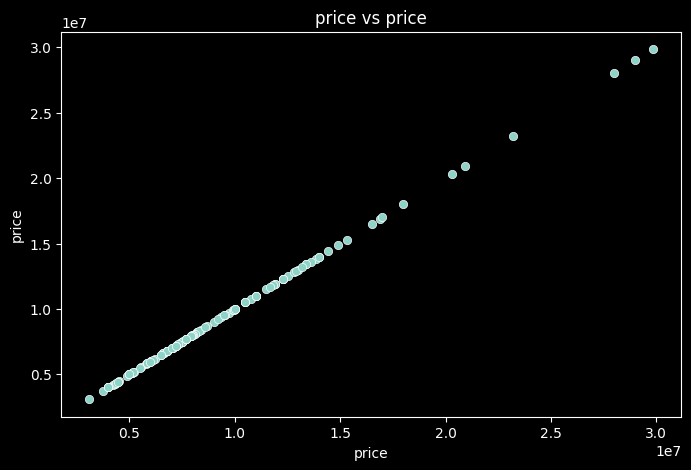

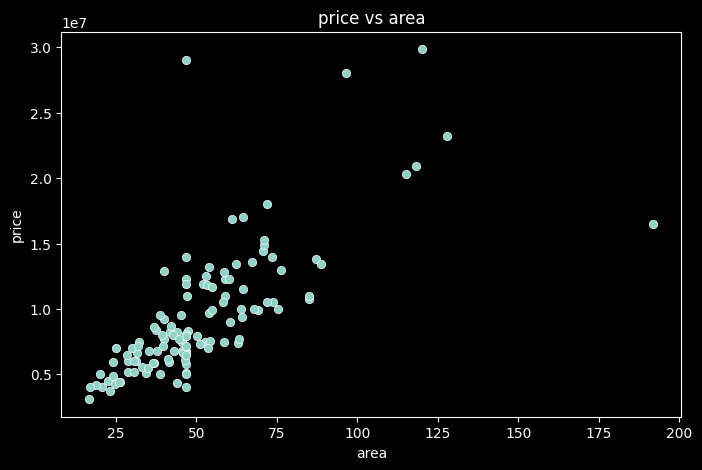

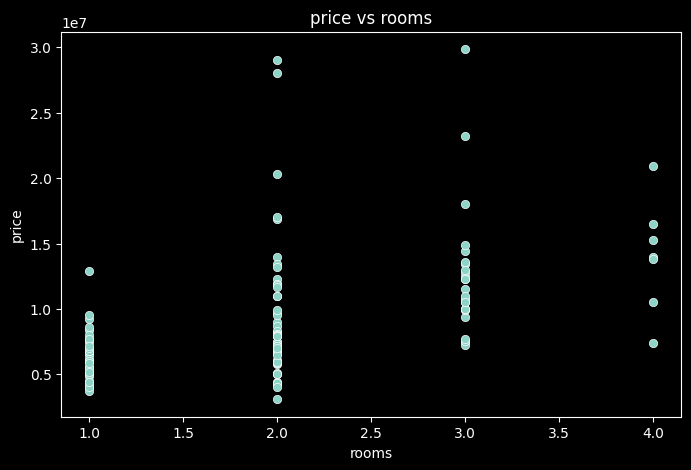

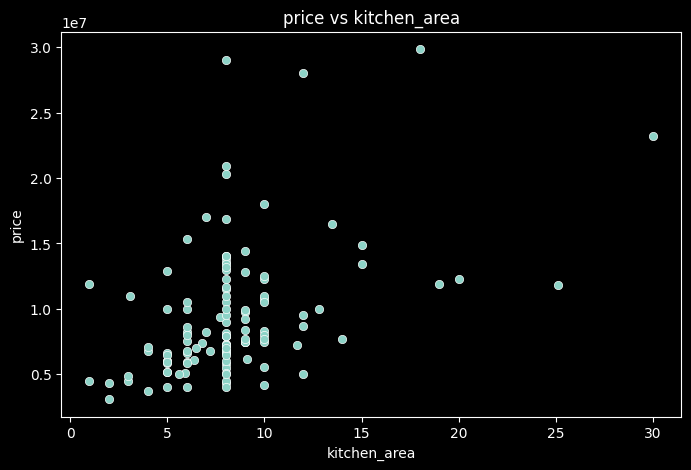

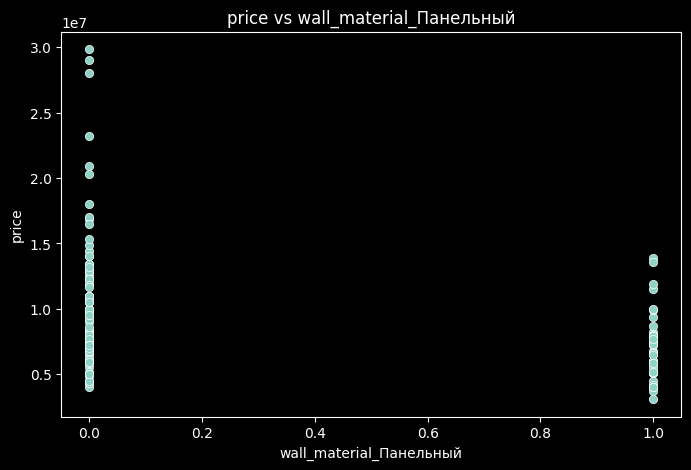

In [18]:
top_features = correlation_matrix['price'].abs().nlargest(5).index
for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data_w, x=feature, y='price')
    plt.title(f'price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

Логарифмирование цены

In [19]:
data_w['price'] = np.log1p(data_w['price'])

Инициализация библиотек для моделирования

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import resample

results = []

Разбиение выборки на целевую переменную и набор признаков к ней

In [21]:
X = data_w.drop('price', axis=1)
y = data_w['price']

Разбиение выборки на тренировочную и тестовую. Из-за малого объема выборки было решено её расширить в 3 раза, используя метод бутстрапа 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = resample(X_train, y_train, n_samples=len(X_train) * 3, random_state=42)

print(X_train.shape)

(288, 25)


Создание препроцессора для стандартизации и энекодирования данных для численных и категориальных данных

In [60]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [feat for feat in numerical_features if feat not in categorical_features]

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

Создание модели линейной регрессии с препроцессором

In [62]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [63]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'area',
                                                   'kitchen_area', 'floor',
                                                   'renovation', 'deal_type',
                                                   'balcony', 'trash_chute',
                                                   'Годпостройки',
                                                   'Количествоэтажей', 'Лифт',
                                                   'Количествобалконов',
                                                   'Количествоквартир']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Типперекрытий',
                                                   'Типфундамента',
                                                   'Горячееводоснабжение',
                                                   'Холодноеводоснабжение'])])),
                ('model', LinearRegression())])

In [64]:
y_pred = pipeline.predict(X_test)

Данная модель получила 0.058 по шкале значимости, что меньше 10%, следовательно можем признать на 10% значимости релевантность модели, хотя она сама описывает только 53% диспрерсии всей выборки

In [66]:
mse = mean_squared_error(y_test, y_pred)

print(f'Linear Regression Validation MSE: {mse}')
print(f'Linear Regression Validation R2: {r2_score(y_test, y_pred)}')

Linear Regression Validation MSE: 0.058743201873328245
Linear Regression Validation R2: 0.5308050345049037


Далее была предположена эффективность моделирования случайным лесом из-за преобладающего количества категориальных переменных и малого объема выборки

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rf_model = RandomForestRegressor()

In [69]:
rf_param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [70]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

С помощью RandomizedSearchCV мы сможем понять, какие наиболее эффективные параметры модели. Для проверки метод использует кросс-валидацию

In [71]:
rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['rooms',
                                                                                'area',
                                                                                'kitchen_area',
                                                                                'floor',
                                                                                'renovation',
                                                                                'deal_type',
                                                                                'balcony',
                                                                                'trash_chute',
                                                                                'Годпостройки',
                                                                                'Количествоэтажей',
                                                                                'Лифт',
                                                                                'Количествобалконов',
                                                                                'Количествоквартир']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Типперекрытий',
                                                                                'Типфундамента',
                                                                                'Горячееводоснабжение',
                                                                                'Холодноеводоснабжение'])])),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200,
                                                                300]},
                   random_state=42, verbose=1)

Получение лучших параметров модели

In [72]:
print(f'Best parameters for Random Forest: {rf_search.best_params_}')


Best parameters for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': None}


Модель не показала значительных отличий от линейной регрессии

In [73]:
y_pred_rf = rf_search.predict(X_test)

print(f'Random Forest Validation MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Random Forest Validation R2: {r2_score(y_test, y_pred_rf)}')

Random Forest Validation MSE: 0.058627515255764436
Random Forest Validation R2: 0.5317290491449831
